In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


full_test = pd.read_csv("test.csv", index_col='id')
full_train = pd.read_csv("train.csv", index_col='id')
test_sz = full_test.sat_id.nunique()

In [2]:
train_coefs = pd.DataFrame({'sat_id': full_test.sat_id.unique(), 'A': np.zeros(test_sz),
                            'B': np.zeros(test_sz), 'C': np.zeros(test_sz), 'D': np.zeros(test_sz)})

In [3]:
from random import shuffle

In [64]:
np.random.seed(31415)

In [65]:
for sat_id in train_coefs.sat_id:
    print(sat_id)
    df = full_train[full_train.sat_id == sat_id]
    ids = list(range(df.shape[0]))
    shuffle(ids)
    n = 0; i = 0
    a = np.zeros(df.shape[0] / 3); b = np.zeros(df.shape[0] / 3)
    c = np.zeros(df.shape[0] / 3); d = np.zeros(df.shape[0] / 3)
    while i + 2 < df.shape[0]:
        p1 = df[['x', 'y', 'z']].iloc[ids[i]].values
        p2 = df[['x', 'y', 'z']].iloc[ids[i + 1]].values
        p3 = df[['x', 'y', 'z']].iloc[ids[i + 2]].values
        i += 3
        
        v1 = p3 - p1
        v2 = p2 - p1

        # the cross product is a vector normal to the plane
        cp = np.cross(v1, v2)
        a[n], b[n], c[n] = cp

        # This evaluates a * x3 + b * y3 + c * z3 which equals d
        d[n] = np.dot(cp, p3)
                
        n += 1
    
    train_coefs.loc[train_coefs.sat_id == sat_id, 'A'] = a.mean()
    train_coefs.loc[train_coefs.sat_id == sat_id, 'B'] = b.mean()
    train_coefs.loc[train_coefs.sat_id == sat_id, 'C'] = c.mean()
    train_coefs.loc[train_coefs.sat_id == sat_id, 'D'] = d.mean()

1
2
3
4
6
9
16
20
22
24
25
26
27
28
29
32
34
35
36
37
38
39
40
41
42
44
45
49
51
52
53
54
57
59
63
64
68
70
75
82
84
86
89
90
91
92
93
96
98
100
101
102
105
106
109
110
112
113
114
117
118
120
121
123
124
125
126
127
128
130
132
133
135
138
142
143
144
145
149
151
152
153
155
156
158
159
160
162
164
165
166
169
170
172
173
177
178
183
186
187
188
191
193
194
195
197
203
205
206
207
208
209
210
211
213
219
220
222
223
225
227
228
229
230
233
236
239
240
241
242
243
244
245
247
248
251
252
253
254
261
263
264
265
268
270
275
277
278
281
284
288
292
293
294
298
299
301
304
306
309
310
312
314
316
319
324
326
332
333
342
343
344
347
348
349
356
357
358
359
362
363
372
373
375
377
380
382
384
385
387
389
390
391
392
393
395
396
399
400
407
409
411
412
415
416
417
418
419
422
423
424
426
428
435
436
437
438
440
443
446
448
449
450
452
454
455
456
457
460
462
464
465
466
467
468
470
471
473
474
475
476
477
479
480
481
482
483
486
488
489
491
495
498
499
502
504
505
506
508
509
510
511
514
515

In [66]:
train_coefs.to_csv("ABCD1.csv", index=False)

In [67]:
abs(train_coefs.C).min()

30479.05038084434

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>


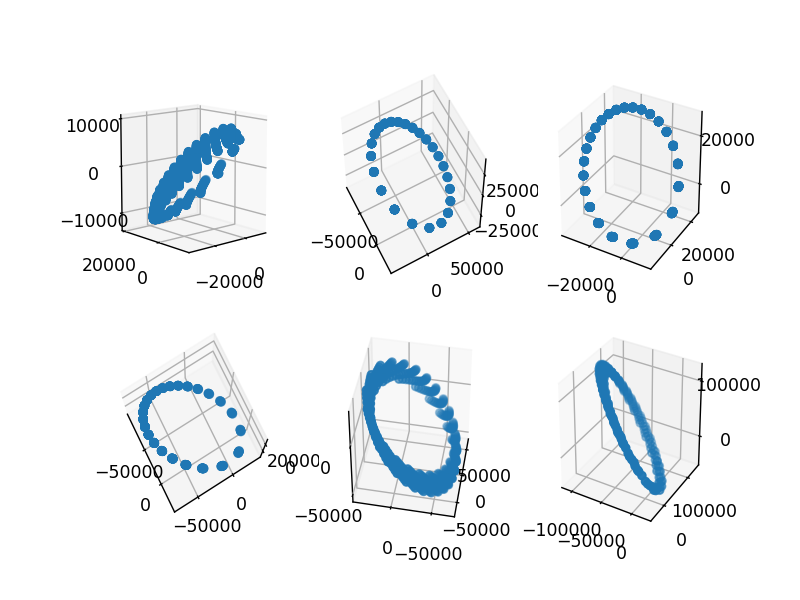

In [35]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(231, projection='3d')
ax.scatter(full_train[full_train.sat_id == 1].x, full_train[full_train.sat_id == 1].y, full_train[full_train.sat_id == 1].z)

ax = fig.add_subplot(232, projection='3d')
ax.scatter(full_train[full_train.sat_id == 2].x, full_train[full_train.sat_id == 2].y, full_train[full_train.sat_id == 2].z)

ax = fig.add_subplot(233, projection='3d')
ax.scatter(full_train[full_train.sat_id == 579].x, full_train[full_train.sat_id == 579].y, full_train[full_train.sat_id == 579].z)

ax = fig.add_subplot(234, projection='3d')
ax.scatter(full_train[full_train.sat_id == 596].x, full_train[full_train.sat_id == 596].y, full_train[full_train.sat_id == 596].z)

ax = fig.add_subplot(235, projection='3d')
ax.scatter(full_train[full_train.sat_id == 6].x, full_train[full_train.sat_id == 6].y, full_train[full_train.sat_id == 6].z)

ax = fig.add_subplot(236, projection='3d')
ax.scatter(full_train[full_train.sat_id == 20].x, full_train[full_train.sat_id == 20].y, full_train[full_train.sat_id == 20].z)


In [70]:
train_coefs = pd.read_csv('ABCD.csv')
train_coefs.head()

,Unnamed: 0,A,B,C,D,sat_id
0,0,-5.157307e+05,-3.289621e+06,-6.461211e+06,1.713491e+09,1
1,1,9.740515e+07,2.092962e+08,2.763665e+08,-6.280615e+09,2
2,2,2.664734e+07,1.453280e+07,-6.363207e+08,4.234425e+10,3
3,3,-1.040108e+07,5.873090e+07,-3.573930e+07,4.030402e+09,4
4,4,-7.233000e+07,-1.352344e+08,2.138616e+08,-1.183111e+10,6


In [71]:
A = train_coefs[train_coefs.sat_id == 1]['A'][0]
A

-515730.7422720711

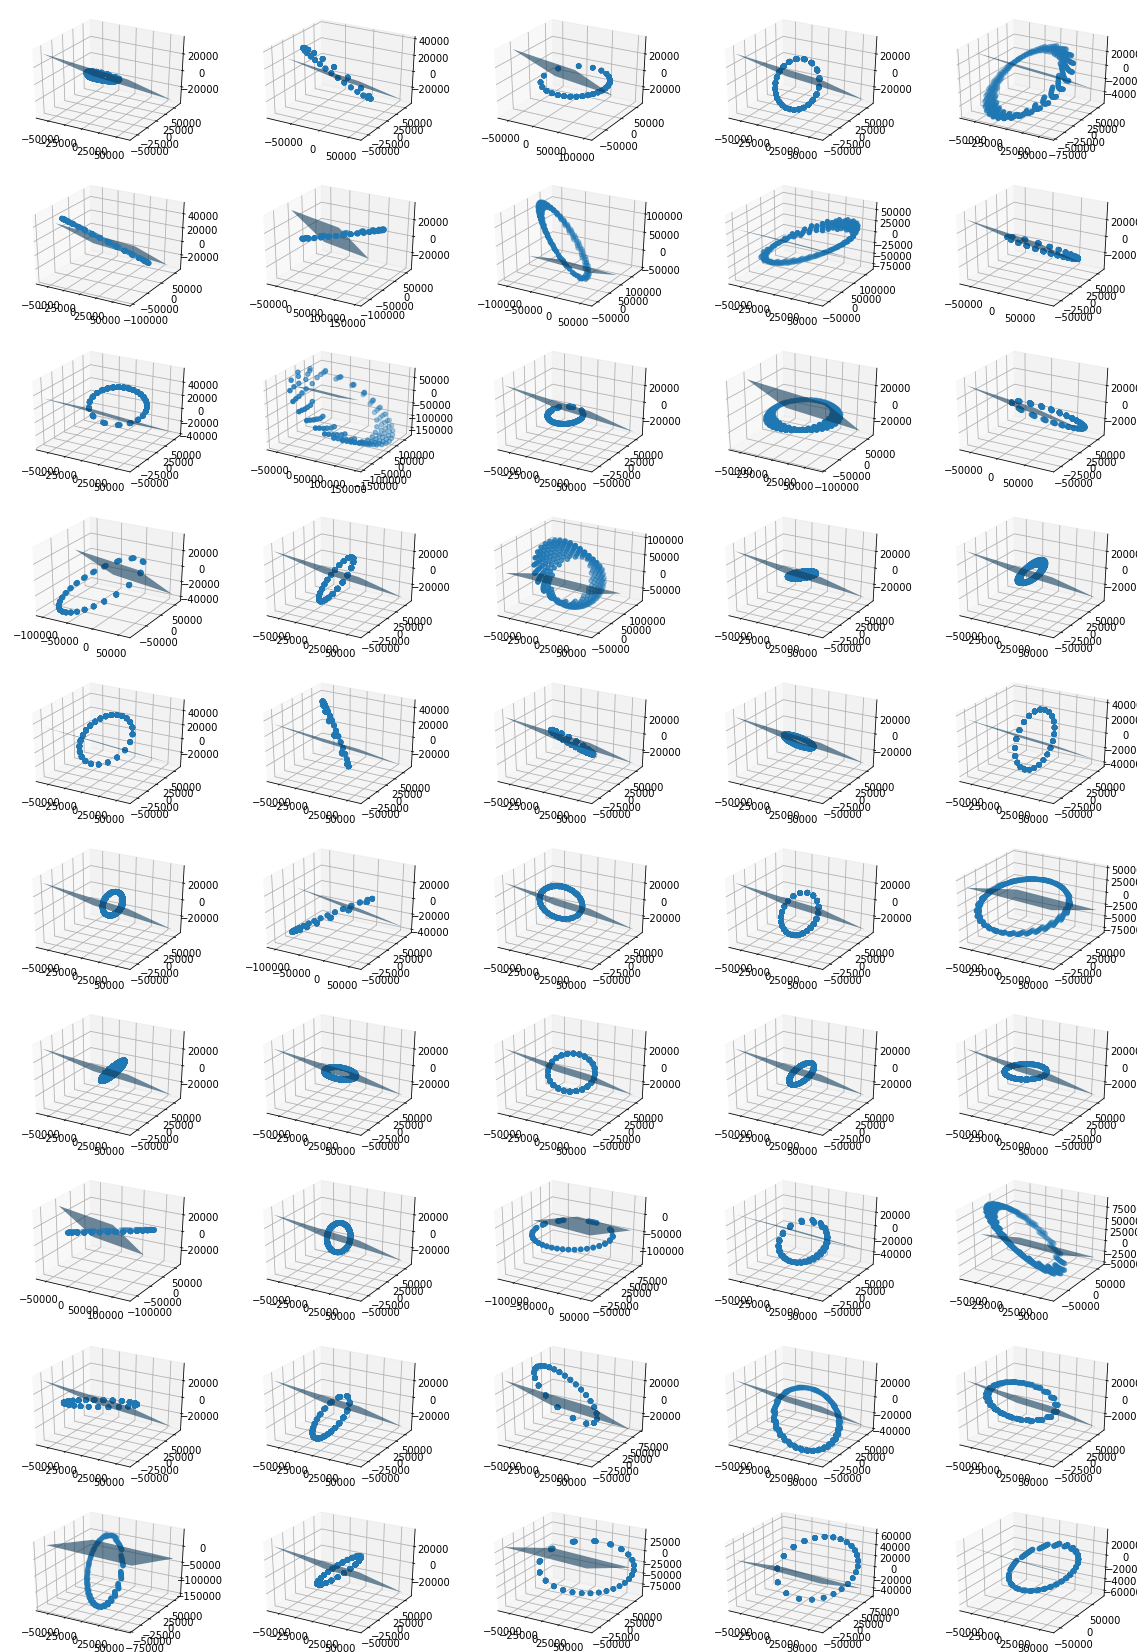

In [77]:
# %matplotlib notebook
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in full_test.sat_id.unique():
    ax = fig.add_subplot(10, 5, i, projection='3d')
    
    xx, yy = np.meshgrid([-60000, 60000], [-60000, 60000], sparse=True)
    A = train_coefs[train_coefs.sat_id == 1]['A'][0]
    B = train_coefs[train_coefs.sat_id == 1]['B'][0]
    C = train_coefs[train_coefs.sat_id == 1]['C'][0]
    D = train_coefs[train_coefs.sat_id == 1]['D'][0]
    zz = (-A * xx - B * yy + D) / C
    ax.plot_surface(xx, yy, zz, alpha=0.6)
    
    
    ax.scatter(full_train[full_train.sat_id == sat_id].x, full_train[full_train.sat_id == sat_id].y, full_train[full_train.sat_id == sat_id].z)
    i += 1
    if i == 51:
        break

In [ ]:
"""def new_coord(df, train_coefs):
    df[['x1', 'y1', 'z1']] = 0
    train_coefs[['x1c, y1c']] = 0
    for sat_id in df.sat_id.values:
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id].values
        d = sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha)
        M = [[d/sqrt(A ** 2 + d ** 2) -B * A / d / sqrt(A ** 2 + d ** 2) -C * A / d / sqrt(A ** 2 + d ** 2)],
            [0 C/d -B/d],
            [A / sqrt(A ** 2 + d ** 2) B / sqrt(A ** 2 + d ** 2) C / sqrt(A ** 2 + d ** 2)]]
        
        sz = df[df.sat_id == sat_id].shape[0]  
        df[df.sat_id == sat_id][['x1', 'y1', 'z1']] = (M * (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T - \
                                      np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T"""
                                                       
        

In [100]:
def new_coord(df, train_coefs):
    df[['x1', 'y1']] = 0
    for sat_id in df.sat_id.values:
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id][['A', 'B', 'C', 'D']].values[0]
        d = sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha) без последней строки
        M = [[d/sqrt(A ** 2 + d ** 2), -B*A/d/ sqrt(A ** 2 + d ** 2), -C*A/d/ sqrt(A ** 2 + d ** 2)],
             [0, C/d, -B/d]]
        
        sz = df[df.sat_id == sat_id].shape[0]  
        df[df.sat_id == sat_id][['x1', 'y1']] = (M @ (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T - \
                                      np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T

SyntaxError: invalid syntax (<ipython-input-100-f812c5feb55a>, line 12)